In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from monks_data_loader import load_monk_data
from monk_utils import * 
import lightgbm as lgb
import pandas as pd
import numpy as np

In [8]:
def run_lightgbm(monk_dataset_id):
    X_train, y_train, X_test, y_test = load_monk_data(monk_dataset_id)

    print(f"Monk dataset id: {monk_dataset_id}")

    param_grid = {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 7],
        "num_leaves": [10, 20, 30],
        "learning_rate": [0.05, 0.1, 0.2],
        "min_child_samples": [5, 10],
        "data_sample_strategy": ["goss"],
        "enable_bundle": [True],
    }

    # cross validation with 3 splits
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    # lightgbm classifier initialization
    base_clf = lgb.LGBMClassifier(random_state=42, verbose=-1, force_col_wise=True)

    grid_search_cv = GridSearchCV(
        estimator=base_clf,
        param_grid=param_grid,
        cv=cv,
        scoring="accuracy",
        n_jobs=-1,
        verbose=1,
        return_train_score=False,
    )

    grid_search_cv.fit(X_train, y_train)

    print(f"Best params: {grid_search_cv.best_params_}")
    print(f"Best cross validation accuracy: {grid_search_cv.best_score_:.4f}")

    # extract best model
    best_model = grid_search_cv.best_estimator_

    y_train_results = best_model.predict(X_train)
    y_test_results = best_model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_results)
    test_acc = accuracy_score(y_test, y_test_results)
    gap = train_acc - test_acc

    print(f"TR Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy:     {test_acc:.4f}")
    print(f"Gap (Train-Test):  {gap:.4f}")
    print(f"CV Mean:           {grid_search_cv.best_score_:.4f}")

    plot_confusion_matrix(
        y_test,
        y_test_results,
        title=f"MONK {monk_dataset_id} Confusion Matrix (Best Model)",
    )

Run ligthgbm on each monk dataset

Monk dataset id: 1
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best params: {'data_sample_strategy': 'goss', 'enable_bundle': True, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_samples': 5, 'n_estimators': 100, 'num_leaves': 20}
Best cross validation accuracy: 0.8959
TR Accuracy: 1.0000
Test Accuracy:     1.0000
Gap (Train-Test):  0.0000
CV Mean:           0.8959


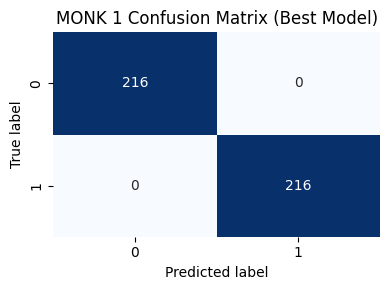

In [9]:
run_lightgbm(1)

Monk dataset id: 2
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best params: {'data_sample_strategy': 'goss', 'enable_bundle': True, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_samples': 5, 'n_estimators': 200, 'num_leaves': 20}
Best cross validation accuracy: 0.7159
TR Accuracy: 1.0000
Test Accuracy:     0.7778
Gap (Train-Test):  0.2222
CV Mean:           0.7159


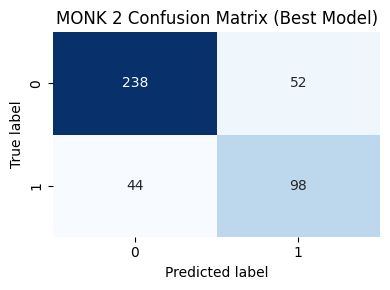

In [10]:
run_lightgbm(2)

Monk dataset id: 3
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best params: {'data_sample_strategy': 'goss', 'enable_bundle': True, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_samples': 5, 'n_estimators': 100, 'num_leaves': 10}
Best cross validation accuracy: 0.9348
TR Accuracy: 1.0000
Test Accuracy:     0.9468
Gap (Train-Test):  0.0532
CV Mean:           0.9348


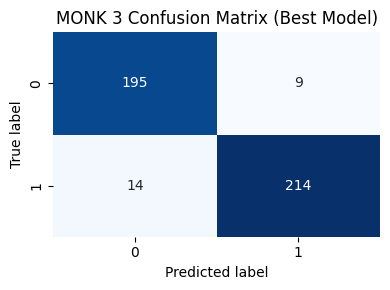

In [11]:
run_lightgbm(3)